In [1]:
from agents.chat_gpt_agent import ChatGPTAgent


### Chat-GPT Agent
The Chat-GPT agent uses prompt engineering to teach chat-gpt the syntax of our GBRL. This way we can use a pretrained model for texting without the need of finetuning it.

In [10]:
agent = ChatGPTAgent()

Pass the following prompt to Chat-GPT:
I will give you a set of instructions in a certain style in tripple quotes. Make sure you respond only in the syntax i expect. I will give you multiple examples and expeced responses with an explanation.
example 1: '''<s1><:>I love my dog.<;><s2><:>I don't own a dog.<;><e1><:><rel1><;><s1><e1><s2><;>'''
example 1 expected response: '''<rel1><:><con><;>'''
example 1 explanation: Two nodes <s1> and <s2> are defined and we ask you to solve for the textual entailment relationship <e1> between those nodes with its placeholder <rel1>. Your task is to predict the placeholder <rel1>, which can be either <ent> for entailment, <con> for contradiction,<neu> for neutral, <nent> for not entailment, <ncon> for not contradiction or <nneu> for not neutral. The statement <s1> strongly suggest the ownership which contradicts <s2>, thats why <rel1> can be filled with <con>.
example 2: '''<s1><:>I is raining on the street.<;><s2><:><t2><;><s1><ent><s2><;>'''
example 

A User has to copy paste the printed prompts from the output interface to the webclient of Chat-GPT.
As before, the user adds nodes to the graph and calls the graph operation. The printed query is then passed to Chat-GPT.
The user then copy pastes the response from Chat-GPT to the input field of this notebook.

Pass the following text to ChatGPT and return with the response.
'''<s1><:>I live in Hamburg.<;><s2><:>I live nearby a river.<;><e1><:><rel1><;><s1><e1><s2><;>'''


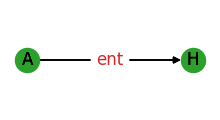

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river."
}


In [11]:
agent.add_node("A", "I live in Hamburg.")
agent.add_node("H", "I live nearby a river.")
agent.relation_between("A", "H")
agent.display_Graph()

In this case Chat-GPT decided against our expectations, that living in Hamburg entails living nearby a river.
Let's see what explanation Chat-GPT gives for that relation.

Pass the following text to ChatGPT and return with the response.
'''<s1><:>I live in Hamburg.<;><s2><:><t2><;><s3><:>I live nearby a river.<;><s1><ent><s2><;><s2><ent><s3><;>'''


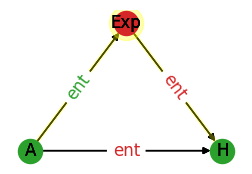

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river.",
    "Exp": "Hamburg is situated near a river."
}


In [12]:
_, changed_nodes, changed_edges, _ = agent.explain_relation("A", "H", "Exp")
agent.display_Graph(changed_nodes, changed_edges)

Chat-GPT argues, that Hamburg is situated near a river, so every person living in Hamburg does live nearby a river.
This argumentation seems reasonable and we can see, why Chat-GPT gave that explanation.

But we made a thought error when defining our expectation and when preparing examples for the initial prompt.
Because the relationship between node **A** and **Exp** is not correct. Living in Hamburg does not entail that Hamburg is situated near a river.
Our initial prompt teaches Chat-GPT definitions, that contradict our GBRL syntax.

Next we ask Chat-GPT to produce a statement that is neutral to node A.

Pass the following text to ChatGPT and return with the response.
'''<s1><:>I live in Hamburg.<;><s2><:><t2><;><s1><neu><s2><;>'''


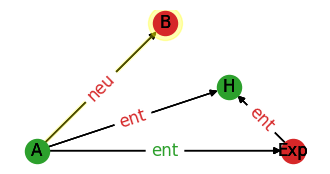

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river.",
    "Exp": "Hamburg is situated near a river.",
    "B": "I reside in a city."
}


In [13]:
_, changed_nodes, changed_edges, _ = agent.generate_entailment("A", "B", relation="neu")
agent.display_Graph(changed_nodes, changed_edges)

This is unexpected. Chat-GPT decided that Living in Hamburg makes it possible to reside in a city or not.
It is not clear, what made Chat-GPT respond with this statement.

Last, we ask Chat-GPT about the relatinship between the statements "I resode om a city." and "I live nearby a river." is.

Pass the following text to ChatGPT and return with the response.
'''<s1><:>I reside in a city.<;><s2><:>I live nearby a river.<;><e1><:><rel1><;><s1><e1><s2><;>'''


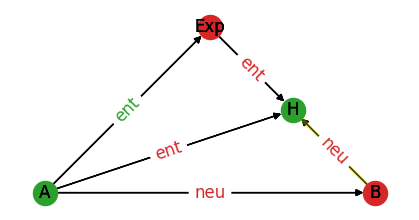

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river.",
    "Exp": "Hamburg is situated near a river.",
    "B": "I reside in a city."
}


In [14]:
_, changed_nodes, changed_edges, _ = agent.relation_between("B", "H")
agent.display_Graph(changed_nodes, changed_edges)

Chat-GPT responded as expected with the neutral relationship. Living in a city could or could not mean living nearby a river.

Because we expect that Chat-GPT made a mistake when generating the node **B**, we Chat-GPT again about the relationship between ndoe **A** and **B**.

Pass the following text to ChatGPT and return with the response.
'''<s1><:>I live in Hamburg.<;><s2><:>I reside in a city.<;><e1><:><rel1><;><s1><e1><s2><;>'''


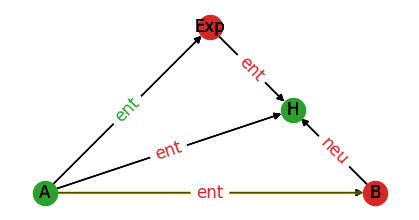

{
    "A": "I live in Hamburg.",
    "H": "I live nearby a river.",
    "Exp": "Hamburg is situated near a river.",
    "B": "I reside in a city."
}


In [15]:
_, changed_nodes, changed_edges, _ = agent.relation_between("A", "B")
agent.display_Graph(changed_nodes, changed_edges)

In fact, Chat-GPT chose the expected relationship **entailment** this time.

We reset the graph for one more query, that underlines a behaviour we will have to address as well.

In [5]:
agent.reset()
agent.add_node("A", "I live in Hamburg.")

Pass the following prompt to Chat-GPT:
I will give you a set of instructions in a certain style in tripple quotes. Make sure you respond only in the syntax i expect. I will give you multiple examples and expeced responses with an explanation.
example 1: '''<s1><:>I love my dog.<;><s2><:>I don't own a dog.<;><e1><:><rel1><;><s1><e1><s2><;>'''
example 1 expected response: '''<rel1><:><con><;>'''
example 1 explanation: Two nodes <s1> and <s2> are defined and we ask you to solve for the textual entailment relationship <e1> between those nodes with its placeholder <rel1>. Your task is to predict the placeholder <rel1>, which can be either <ent> for entailment, <con> for contradiction,<neu> for neutral, <nent> for not entailment, <ncon> for not contradiction or <nneu> for not neutral. The statement <s1> strongly suggest the ownership which contradicts <s2>, thats why <rel1> can be filled with <con>.
example 2: '''<s1><:>I is raining on the street.<;><s2><:><t2><;><s1><ent><s2><;>'''
example 

We are asking Chat-GPT to produce a node **B** that entails from node **A**.

Pass the following text to ChatGPT and return with the response.
'''<s1><:>I live in Hamburg.<;><s2><:><t2><;><s1><ent><s2><;>'''


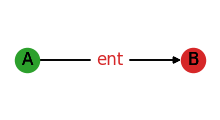

{
    "A": "I live in Hamburg.",
    "B": "Hamburg is my current place of residence."
}


In [6]:
agent.generate_entailment("A", "B", "ent")
agent.display_Graph()

Chat-GPT produced a node **B** with a statement that technicaly entails from node **A**, but does not help any argument structur,
because its a paraphrase. No information was added or removed.